###1.  Load the Dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv('/content/winequality-red.csv')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#checking the null values in the dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###2.  Data preprocessing including visualization

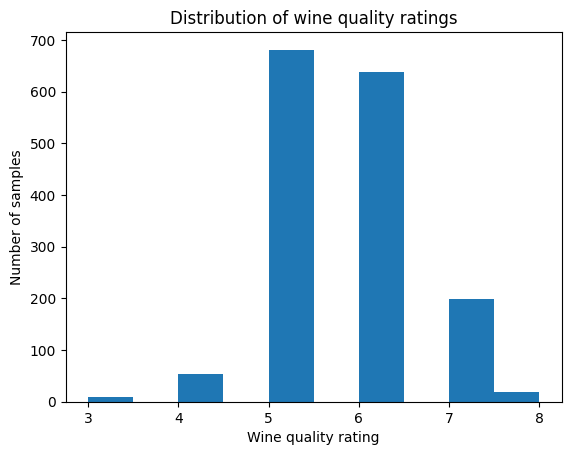

In [8]:
plt.hist(df['quality'])
plt.xlabel('Wine quality rating')
plt.ylabel('Number of samples')
plt.title('Distribution of wine quality ratings')
plt.show()

<Axes: xlabel='chlorides', ylabel='density'>

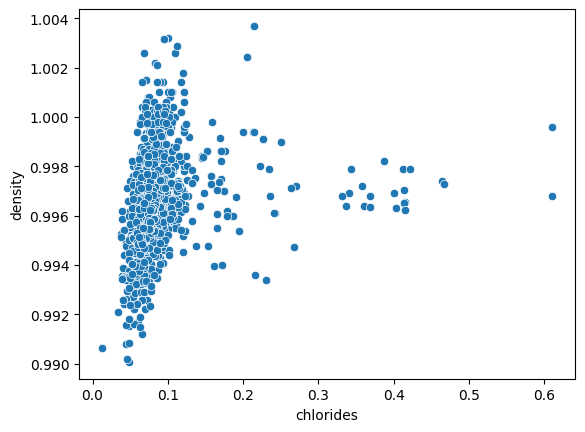

In [9]:
#Scatter Plot
sns.scatterplot(x=df.chlorides,y=df.density)

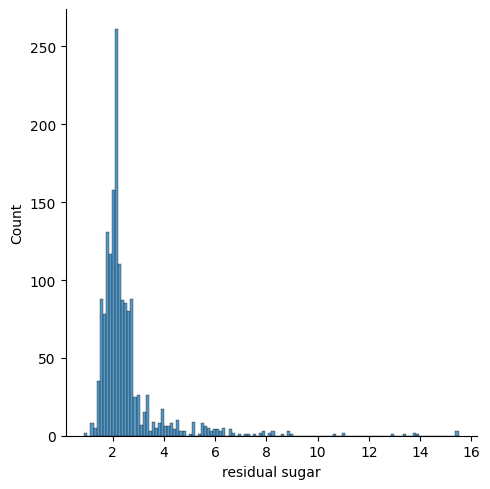

In [10]:
sns.displot(df['residual sugar'])

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

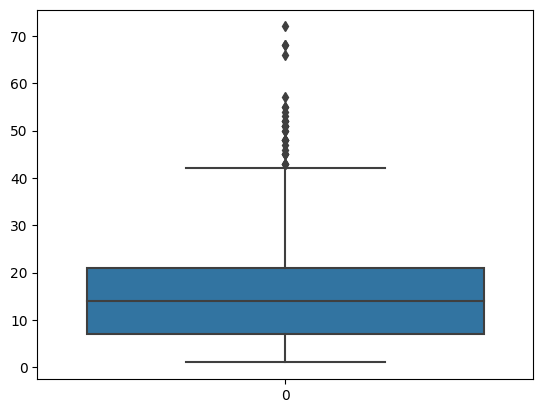

In [12]:
sns.boxplot(df['free sulfur dioxide'])

In [14]:
q1=df['free sulfur dioxide'].quantile(0.25)#Q1
q3=df['free sulfur dioxide'].quantile(0.75)#Q3

In [16]:
print(q1)
print(q3)

7.0
21.0


In [18]:
IQR=q3-q1
IQR

14.0

In [20]:
upper_limit=q3+1.5*IQR
upper_limit

42.0

In [22]:
lower_limit=q1-1.5*IQR
lower_limit

-14.0

In [23]:
df.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [25]:
df['free sulfur dioxide']=np.where(df['free sulfur dioxide']>upper_limit,30,df['free sulfur dioxide'])

<Axes: >

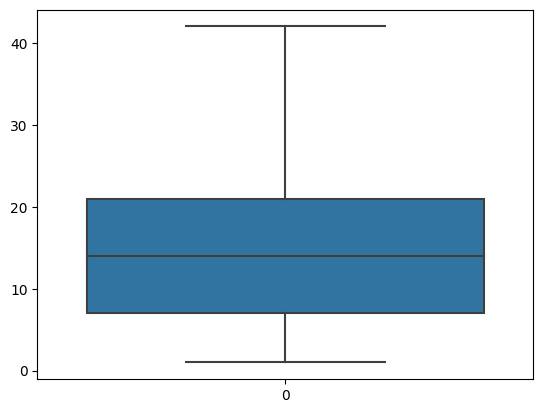

In [29]:
sns.boxplot(df['free sulfur dioxide'])

In [30]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.160871,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.006958,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.059268,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.104177,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,-0.022725,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.160871,-0.006958,-0.059268,0.104177,-0.022725,1.000000,0.672189,-0.050926,0.075877,0.053979,-0.061706,-0.050174
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.672189,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.050926,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.075877,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.053979,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

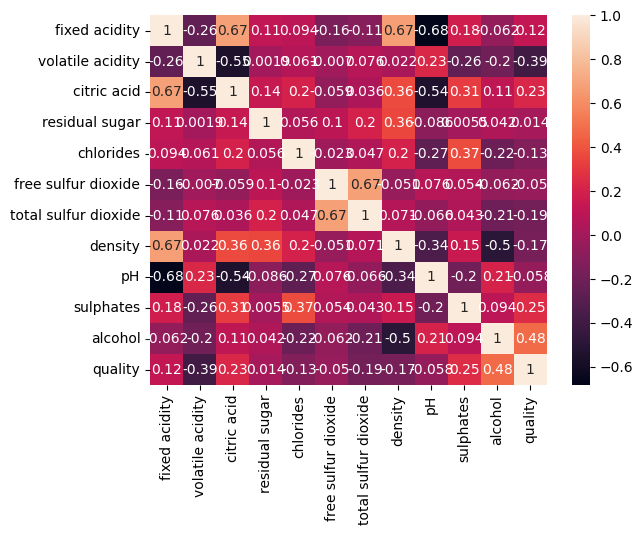

In [31]:
sns.heatmap(df.corr(),annot=True)

###3.  Machine Learning Model building, Evaluate the model and testing

In [33]:
x=df.drop(columns=['quality'],axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [36]:
y=df.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [40]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [41]:
scaled_x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
scaled_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.243902,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.585366,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.341463,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.390244,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.243902,0.098940,0.567548,0.606299,0.137725,0.153846


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=42)

In [43]:
x_train.shape

(1279, 11)

In [44]:
y_train.shape

(1279,)

In [45]:
x_test.shape


(320, 11)

In [46]:
#Model Building
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [47]:
model.fit(x_test,y_test)

LogisticRegression()

In [48]:
model.fit(x_train,y_train)

LogisticRegression()

In [50]:
pred=model.predict(x_test)
pred

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 7, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       7, 5, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       7, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 7, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 5,

In [51]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
1259    6
1295    5
1155    5
963     6
704     4
Name: quality, Length: 320, dtype: int64

In [54]:
model.predict([[16,68,68,56,234,577,8990,1,3,4,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([5])

In [55]:
#Accuracy Score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score,roc_curve

In [56]:
accuracy_score(y_test,pred)

0.55625

In [57]:
confusion_matrix(y_test,pred)

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  9,  1,  0,  0],
       [ 0,  0, 99, 31,  0,  0],
       [ 0,  0, 51, 76,  5,  0],
       [ 0,  0,  3, 36,  3,  0],
       [ 0,  0,  0,  1,  4,  0]])

In [58]:
pd.crosstab(y_test,pred)

col_0,5,6,7
quality,,,
3,1,0,0
4,9,1,0
5,99,31,0
6,51,76,5
7,3,36,3
8,0,1,4


In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.61      0.76      0.68       130
           6       0.52      0.58      0.55       132
           7       0.25      0.07      0.11        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.23      0.23      0.22       320
weighted avg       0.50      0.56      0.52       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#ROC_AUC score
probability=model.predict_proba(x_test)[:,1]
probability

array([0.03530926, 0.02003179, 0.03122286, 0.01862665, 0.03647858,
       0.01703074, 0.01326492, 0.06661487, 0.0289151 , 0.05334136,
       0.02410975, 0.07936942, 0.03636973, 0.02768304, 0.01985915,
       0.01777035, 0.03755248, 0.02455429, 0.01467003, 0.03608496,
       0.09750669, 0.03065711, 0.0582318 , 0.03708642, 0.05741349,
       0.04001358, 0.01813427, 0.05753254, 0.03119238, 0.01860149,
       0.03432105, 0.04045406, 0.02390596, 0.04024382, 0.04340563,
       0.02633552, 0.0292024 , 0.06802271, 0.03115601, 0.02875851,
       0.02530511, 0.02703202, 0.02082059, 0.02354948, 0.02081848,
       0.05773986, 0.0152965 , 0.02019855, 0.06141236, 0.06644236,
       0.01924451, 0.02139808, 0.07766285, 0.040591  , 0.03594625,
       0.02297714, 0.04155322, 0.06390363, 0.03597454, 0.04893544,
       0.03089336, 0.03007791, 0.02647385, 0.0327549 , 0.01208829,
       0.01475674, 0.01643197, 0.0581948 , 0.02111383, 0.01860606,
       0.01992085, 0.04706243, 0.02188644, 0.04343579, 0.03389

In [61]:
##Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='entropy')

In [62]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [64]:
r_y_predict=model.predict(x_test)
r_y_predict_train=model.predict(x_train)

In [65]:
print('Testing Accuracy= ',accuracy_score(y_test,r_y_predict))
print('Training Accuracy= ',accuracy_score(y_train,r_y_predict_train))

Testing Accuracy=  0.64375
Training Accuracy=  1.0
